In [3]:
### Setting env
import os, sys

folder = os.getcwd()
if(not(folder.endswith('tcc-machine-learning'))):
        os.chdir('..')
folder = os.getcwd()

### Core Packages
import pandas as pd
import numpy as np

### Visualization Packages
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
import plotly.graph_objects as go

### Financial Packages
import yfinance as yf
import pandas_datareader as pdr

### Thecnical Analysis Packages
import pandas_datareader as pdr
import ta
import pandas_ta as pdta
import talib

### Functions
from dags import config
from dags.utils import chose_path_to_work, save_image, generate_bollinger_bands, generate_ifr, generate_macd, generate_mme, generate_mme_label, generate_mms, generate_mms_label, generate_label

### Others
import warnings

In [4]:
ticker = 'petr4.sa'
df_ticker = pd.read_csv(f'data/processed/{ticker}_processed.csv', encoding='utf8', delimiter=',')
df_ticker['date'] = pd.to_datetime(df_ticker['date'])

In [5]:
df_ticker_target = df_ticker.loc[df_ticker['date'] >= '2015-01-01']
df_ticker3 = generate_label(3, df_ticker_target)
df_ticker5 = generate_label(5, df_ticker_target)
df_ticker7 = generate_label(7, df_ticker_target)
df_ticker15 = generate_label(15, df_ticker_target)
df_ticker30 = generate_label(30, df_ticker_target)

##### compra

###### 1 - 0 =  1  -> erro
###### 1 - 1 =  0  -> acerto
###### 0 - 0 =  0  -> neutro
###### 0 - 1 = -1  -> neutro

##### venda

###### 1 - 0 =  1  -> acerto
###### 1 - 1 =  0  -> erro
###### 0 - 0 =  0  -> neutro
###### 0 - 1 = -1  -> neutro

In [16]:
def valida_mms_label(df):
    df['tipo_acerto_compra'] = np.where((df['mms_compra'] == 1) & (df['target'] == 1), 1, 
                                            np.where((df['mms_compra'] == 1) & (df['target'] == 0), -1, 0))

    df['tipo_acerto_venda'] = np.where((df['mms_venda'] == 1) & (df['target'] == 0), 1, 
                                            np.where((df['mms_venda'] == 1) & (df['target'] == 1), -1, 0))
                                            
    total = df.shape[0]

    acertos_compra = df['tipo_acerto_compra'].value_counts()[1]
    erros_compra = df['tipo_acerto_compra'].value_counts()[-1]

    acertos_venda = df['tipo_acerto_venda'].value_counts()[1]
    erros_venda = df['tipo_acerto_venda'].value_counts()[-1]

    porcent_compra = acertos_compra / (acertos_compra + erros_compra)
    porcent_venda = acertos_venda / (acertos_venda + erros_venda)

    porcentagem_previsao_compra =  (acertos_compra + erros_compra) / total
    porcentagem_previsao_venda =  (acertos_venda + erros_venda) / total

    porcentagem_previsao =  (acertos_compra  + acertos_venda +  erros_compra + erros_venda) / total

    print(f"Porcentagem de previsao: {round(porcentagem_previsao * 100, 2)}%\n")

    print(f"Porcentagem de previsões de compra: {round(porcentagem_previsao_compra * 100, 2)}%")
    print(f"Porcentagem de acerto na compra: {round(porcent_compra * 100, 2)}%\n")

    print(f"Porcentagem de previsões de venda: {round(porcentagem_previsao_venda * 100, 2)}%")
    print(f"Porcentagem de acerto na venda: {round(porcent_venda * 100, 2)}%\n")

def valida_bb_label(df):
    df['tipo_acerto_compra'] = np.where((df['bb_sobrevendida'] == 1) & (df['target'] == 1), 1, 
                                            np.where((df['bb_sobrevendida'] == 1) & (df['target'] == 0), -1, 0))

    df['tipo_acerto_venda'] = np.where((df['bb_sobrecomprada'] == 1) & (df['target'] == 0), 1, 
                                            np.where((df['bb_sobrecomprada'] == 1) & (df['target'] == 1), -1, 0))
                                            
    total = df.shape[0]

    acertos_compra = df['tipo_acerto_compra'].value_counts()[1]
    erros_compra = df['tipo_acerto_compra'].value_counts()[-1]

    acertos_venda = df['tipo_acerto_venda'].value_counts()[1]
    erros_venda = df['tipo_acerto_venda'].value_counts()[-1]

    porcent_compra = acertos_compra / (acertos_compra + erros_compra)
    porcent_venda = acertos_venda / (acertos_venda + erros_venda)

    porcentagem_previsao_compra =  (acertos_compra + erros_compra) / total
    porcentagem_previsao_venda =  (acertos_venda + erros_venda) / total

    porcentagem_previsao =  (acertos_compra  + acertos_venda +  erros_compra + erros_venda) / total

    print(f"Porcentagem de previsao: {round(porcentagem_previsao * 100, 2)}%\n")

    print(f"Porcentagem de previsões de compra: {round(porcentagem_previsao_compra * 100, 2)}%")
    print(f"Porcentagem de acerto na compra: {round(porcent_compra * 100, 2)}%\n")

    print(f"Porcentagem de previsões de venda: {round(porcentagem_previsao_venda * 100, 2)}%")
    print(f"Porcentagem de acerto na venda: {round(porcent_venda * 100, 2)}%\n")

def valida_ifr_label(df):
    df['tipo_acerto_compra'] = np.where((df['ifr_sobrevendida'] == 1) & (df['target'] == 1), 1, 
                                            np.where((df['ifr_sobrevendida'] == 1) & (df['target'] == 0), -1, 0))

    df['tipo_acerto_venda'] = np.where((df['ifr_sobrecomprada'] == 1) & (df['target'] == 0), 1, 
                                            np.where((df['ifr_sobrecomprada'] == 1) & (df['target'] == 1), -1, 0))
                                            
    total = df.shape[0]

    acertos_compra = df['tipo_acerto_compra'].value_counts()[1]
    erros_compra = df['tipo_acerto_compra'].value_counts()[-1]

    acertos_venda = df['tipo_acerto_venda'].value_counts()[1]
    erros_venda = df['tipo_acerto_venda'].value_counts()[-1]

    porcent_compra = acertos_compra / (acertos_compra + erros_compra)
    porcent_venda = acertos_venda / (acertos_venda + erros_venda)

    porcentagem_previsao_compra =  (acertos_compra + erros_compra) / total
    porcentagem_previsao_venda =  (acertos_venda + erros_venda) / total

    porcentagem_previsao =  (acertos_compra  + acertos_venda +  erros_compra + erros_venda) / total

    print(f"Porcentagem de previsao: {round(porcentagem_previsao * 100, 2)}%\n")

    print(f"Porcentagem de previsões de compra: {round(porcentagem_previsao_compra * 100, 2)}%")
    print(f"Porcentagem de acerto na compra: {round(porcent_compra * 100, 2)}%\n")

    print(f"Porcentagem de previsões de venda: {round(porcentagem_previsao_venda * 100, 2)}%")
    print(f"Porcentagem de acerto na venda: {round(porcent_venda * 100, 2)}%\n")

def valida_macd_label(df):
    df['tipo_acerto_compra'] = np.where((df['macd_alta'] == 1) & (df['target'] == 1), 1, 
                                            np.where((df['macd_alta'] == 1) & (df['target'] == 0), -1, 0))

    df['tipo_acerto_venda'] = np.where((df['macd_baixa'] == 1) & (df['target'] == 0), 1, 
                                            np.where((df['macd_baixa'] == 1) & (df['target'] == 1), -1, 0))
                                            
    total = df.shape[0]

    acertos_compra = df['tipo_acerto_compra'].value_counts()[1]
    erros_compra = df['tipo_acerto_compra'].value_counts()[-1]

    acertos_venda = df['tipo_acerto_venda'].value_counts()[1]
    erros_venda = df['tipo_acerto_venda'].value_counts()[-1]

    porcent_compra = acertos_compra / (acertos_compra + erros_compra)
    porcent_venda = acertos_venda / (acertos_venda + erros_venda)

    porcentagem_previsao_compra =  (acertos_compra + erros_compra) / total
    porcentagem_previsao_venda =  (acertos_venda + erros_venda) / total

    porcentagem_previsao =  (acertos_compra  + acertos_venda +  erros_compra + erros_venda) / total

    print(f"Porcentagem de previsao: {round(porcentagem_previsao * 100, 2)}%\n")

    print(f"Porcentagem de previsões de compra: {round(porcentagem_previsao_compra * 100, 2)}%")
    print(f"Porcentagem de acerto na compra: {round(porcent_compra * 100, 2)}%\n")

    print(f"Porcentagem de previsões de venda: {round(porcentagem_previsao_venda * 100, 2)}%")
    print(f"Porcentagem de acerto na venda: {round(porcent_venda * 100, 2)}%\n")

def corr_features(df, n_days, columns_to_corr):
    n_days = n_days * -1
    df['close_shift'] = df['close'].shift(n_days)

    df_corr = df[['close_shift'] + columns_to_corr].corr(method='pearson')

    plt.figure(figsize=(20, 15))
    sns.heatmap(df_corr, annot=True)
    plt.show()

In [30]:
print('3 Dias')
valida_mms_label(df_ticker3)

3 Dias
Porcentagem de previsao: 3.67%

Porcentagem de previsões de compra: 1.84%
Porcentagem de acerto na compra: 52.94%

Porcentagem de previsões de venda: 1.84%
Porcentagem de acerto na venda: 35.29%



In [31]:
print('3 Dias')
valida_bb_label(df_ticker3)

3 Dias
Porcentagem de previsao: 12.53%

Porcentagem de previsões de compra: 5.08%
Porcentagem de acerto na compra: 48.94%

Porcentagem de previsões de venda: 7.45%
Porcentagem de acerto na venda: 46.38%



In [32]:
print('3 Dias')
valida_ifr_label(df_ticker3)

3 Dias
Porcentagem de previsao: 10.96%

Porcentagem de previsões de compra: 2.81%
Porcentagem de acerto na compra: 53.85%

Porcentagem de previsões de venda: 8.15%
Porcentagem de acerto na venda: 48.34%



In [33]:
print('3 Dias')
valida_macd_label(df_ticker3)

3 Dias
Porcentagem de previsao: 7.4%

Porcentagem de previsões de compra: 3.67%
Porcentagem de acerto na compra: 58.82%

Porcentagem de previsões de venda: 3.73%
Porcentagem de acerto na venda: 37.68%



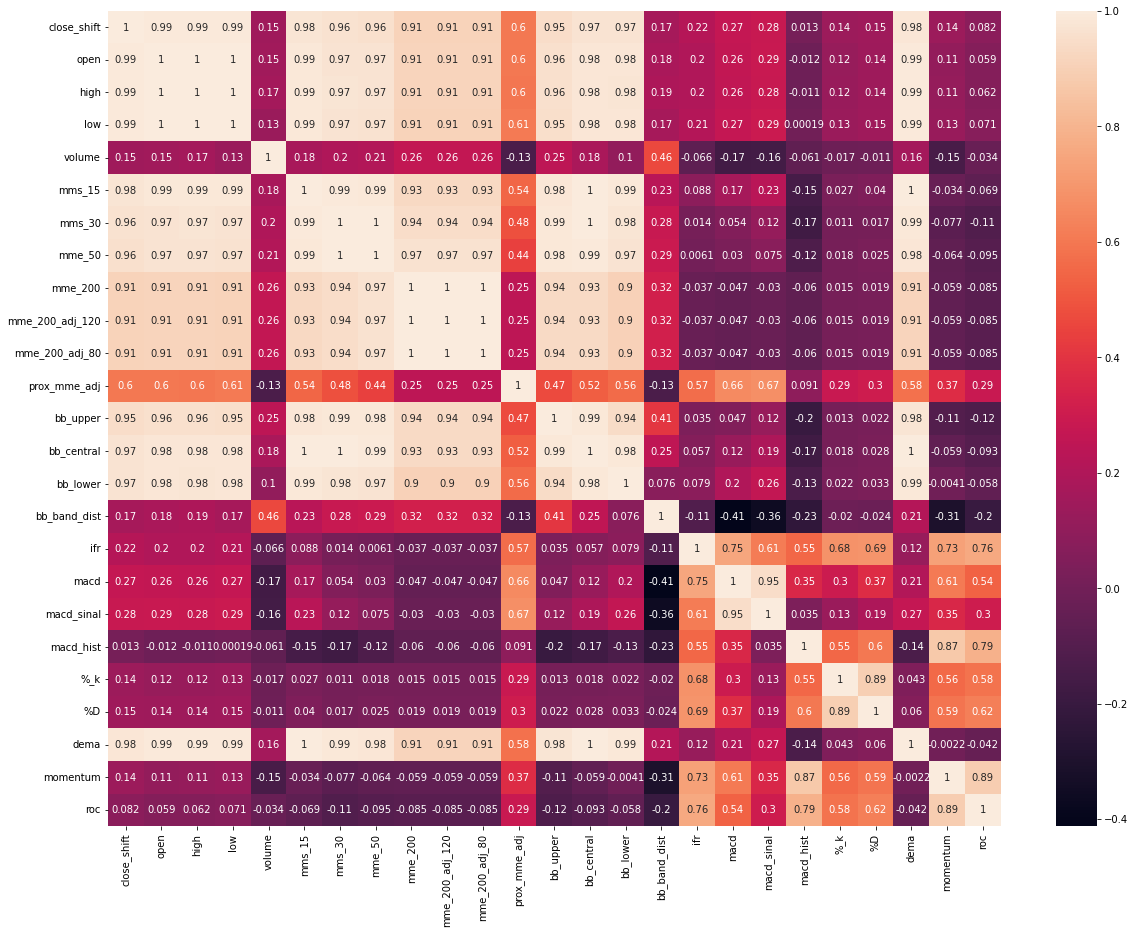

In [17]:
### Correlação
columns_to_corr = ['open', 'high', 'low', 'volume', 'mms_15', 'mms_30', 'mme_50', 'mme_200',
                   'mme_200_adj_120', 'mme_200_adj_80', 'prox_mme_adj', 'bb_upper', 'bb_central', 
                   'bb_lower', 'bb_band_dist', 'ifr', 'macd', 'macd_sinal', 'macd_hist', '%_k', '%D', 
                   'dema', 'momentum', 'roc']

corr_features(df_ticker3, 3, columns_to_corr)

<AxesSubplot:xlabel='date'>

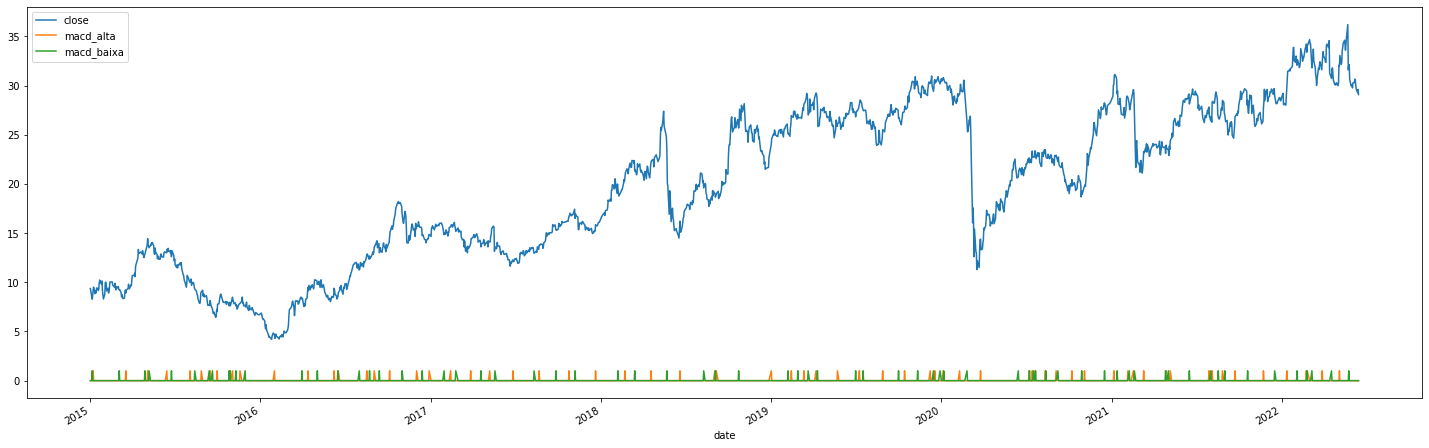

In [28]:
df_ticker3[['date', 'close', 'macd_alta', 'macd_baixa']].dropna().plot(
    figsize=(25,8),
    x = 'date'
)

Index(['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume', 'mms_15',
       'mms_30', 'mms_compra', 'mms_venda', 'mme_50', 'mme_200',
       'mme_200_adj_120', 'mme_200_adj_80', 'prox_mme_adj', 'bb_upper',
       'bb_central', 'bb_lower', 'bb_band_dist', 'bb_sobrecomprada',
       'bb_sobrevendida', 'ifr', 'ifr_sobrecomprada', 'ifr_sobrevendida',
       'macd', 'macd_sinal', 'macd_hist', 'macd_alta', 'macd_baixa', '%_k',
       '%D', 'dema', 'momentum', 'roc', 'target', 'tipo_acerto_compra',
       'tipo_acerto_venda'],
      dtype='object')